# Mini Experiment 1: Differentiable PBF Learning - Two Layers

In this experiment, we will use two layers KAN architecture to approximate a Differentiable PBF

Initial the parameter and data

In [3]:
from kan import *
import torch

f = lambda x: (1 - (1 - torch.sigmoid(x[:, [0]]) * torch.sigmoid(x[:, [1]]))) + (1 - (1 - torch.sigmoid(x[:, [2]]) * (1 - torch.sigmoid(x[:, [3]])))) + (1 - torch.sigmoid(x[:, [0]]) * (1 - torch.sigmoid(x[:, [3]])))

dataset = create_dataset(f, n_var=4,train_num=3000)
model = KAN(width=[4,9,1], grid=10, k=3, seed=0)

Plot the initial KAN

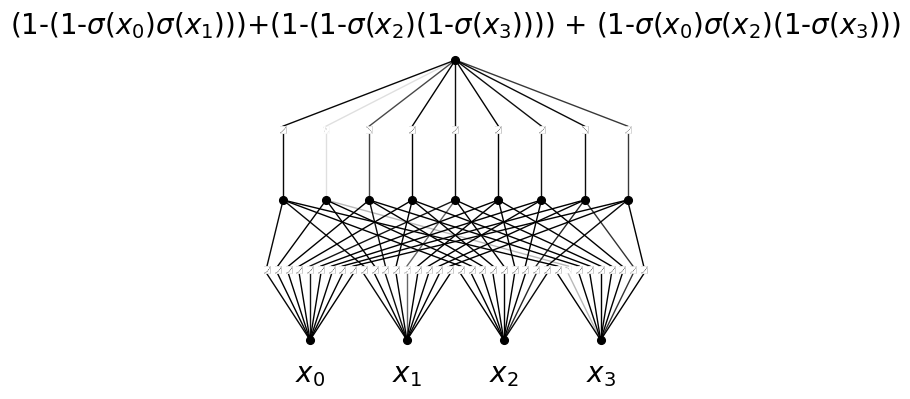

In [105]:
model(dataset['train_input'])
model.plot(beta=100,in_vars=['$x_0$','$x_1$','$x_2$','$x_3$'], out_vars=['(1-(1-$\sigma$($x_0$)$\sigma$($x_1$)))+(1-(1-$\sigma$($x_2$)(1-$\sigma$($x_3$)))) + (1-$\sigma$($x_0$)$\sigma$($x_2$)(1-$\sigma$($x_3$)))'])

## Exp1: steps=50,grids=[3,5,10,20,50],opt="LBFGS"

In [164]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 3.03e-04 | test loss: 3.26e-04 | reg: 1.82e+01 : 100%|██| 50/50 [00:38<00:00,  1.29it/s]
train loss: 8.52e-05 | test loss: 9.32e-05 | reg: 1.82e+01 : 100%|██| 50/50 [00:40<00:00,  1.22it/s]
train loss: 3.20e-05 | test loss: 3.85e-05 | reg: 1.82e+01 : 100%|██| 50/50 [00:52<00:00,  1.04s/it]
train loss: 2.15e-05 | test loss: 3.16e-05 | reg: 1.82e+01 : 100%|██| 50/50 [01:18<00:00,  1.57s/it]
train loss: 1.05e-04 | test loss: 4.73e-03 | reg: 1.79e+01 : 100%|██| 50/50 [03:01<00:00,  3.64s/it]


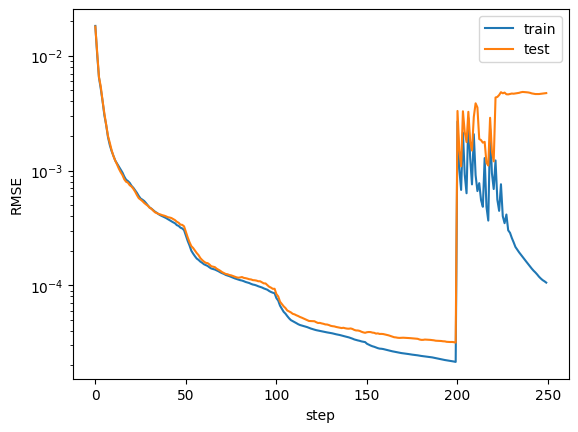

In [165]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

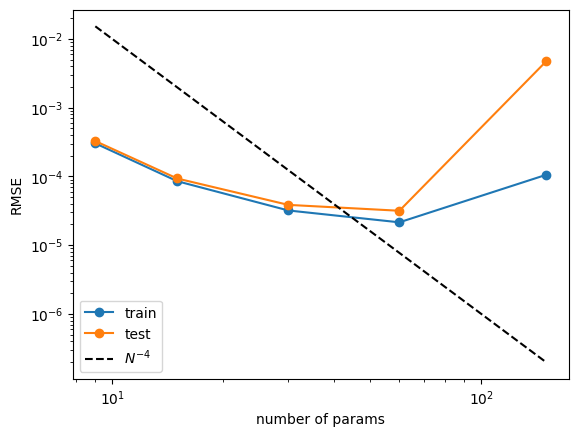

In [166]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp2: steps=50,grids=[3,5,10,15,20],opt="LBFGS"

In [124]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.88e-04 | test loss: 3.05e-04 | reg: 1.82e+01 : 100%|██| 50/50 [00:40<00:00,  1.25it/s]
train loss: 8.65e-05 | test loss: 9.36e-05 | reg: 1.82e+01 : 100%|██| 50/50 [00:41<00:00,  1.20it/s]
train loss: 3.34e-05 | test loss: 3.95e-05 | reg: 1.82e+01 : 100%|██| 50/50 [00:51<00:00,  1.03s/it]
train loss: 2.36e-05 | test loss: 3.47e-05 | reg: 1.82e+01 : 100%|██| 50/50 [01:05<00:00,  1.31s/it]
train loss: 2.10e-05 | test loss: 3.57e-05 | reg: 1.82e+01 : 100%|██| 50/50 [00:47<00:00,  1.05it/s]


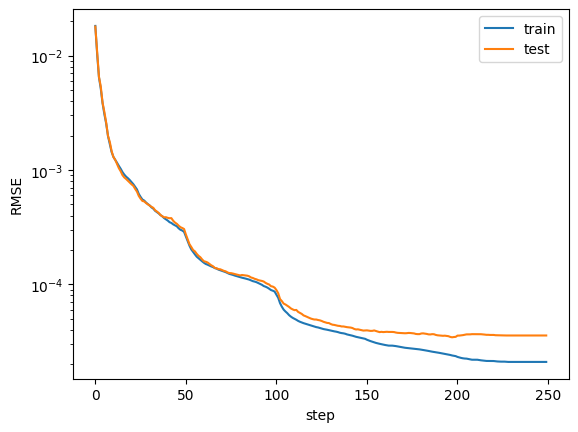

In [125]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

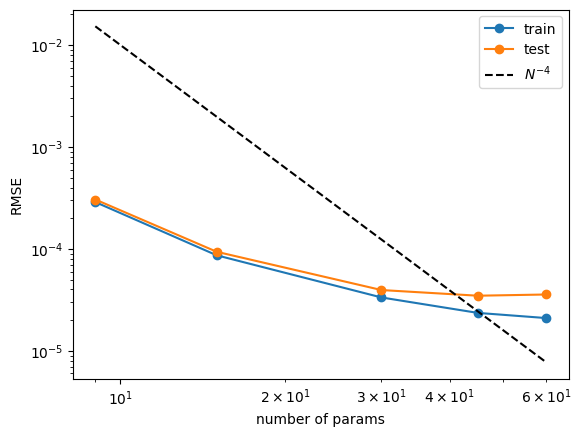

In [126]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp3: steps=30,grids=[3,5,10,15,20],opt="LBFGS"

In [128]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 30
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 5.04e-04 | test loss: 5.02e-04 | reg: 1.82e+01 : 100%|██| 30/30 [00:24<00:00,  1.24it/s]
train loss: 1.58e-04 | test loss: 1.60e-04 | reg: 1.82e+01 : 100%|██| 30/30 [00:25<00:00,  1.16it/s]
train loss: 6.24e-05 | test loss: 7.04e-05 | reg: 1.82e+01 : 100%|██| 30/30 [00:34<00:00,  1.14s/it]
train loss: 4.26e-05 | test loss: 6.18e-05 | reg: 1.82e+01 : 100%|██| 30/30 [00:42<00:00,  1.41s/it]
train loss: 3.31e-05 | test loss: 5.92e-05 | reg: 1.82e+01 : 100%|██| 30/30 [00:50<00:00,  1.70s/it]


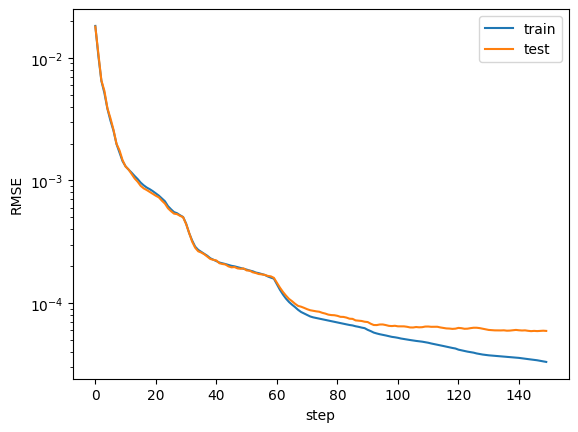

In [129]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

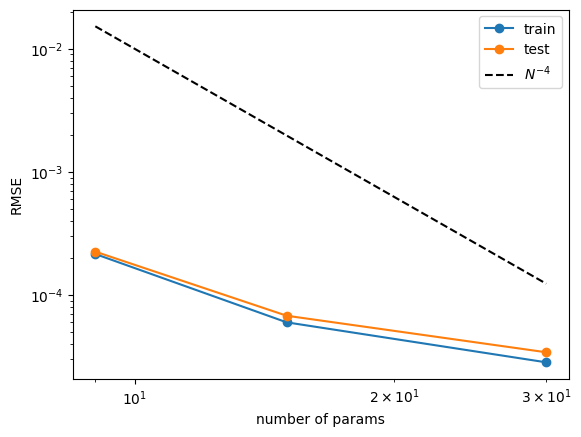

In [131]:
plt.yscale('log')
n_params = 3 * grids
train_vs_G = train_rmse[(steps - 1)::steps]
test_vs_G = test_rmse[(steps - 1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100 * n_params ** (-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp4: steps=70,grids=[3,5,10],opt="LBFGS"

In [130]:
grids = np.array([3,5,10])

train_rmse = []
test_rmse = []
steps = 70
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.15e-04 | test loss: 2.25e-04 | reg: 1.81e+01 : 100%|██| 70/70 [00:52<00:00,  1.32it/s]
train loss: 5.99e-05 | test loss: 6.78e-05 | reg: 1.81e+01 : 100%|██| 70/70 [00:59<00:00,  1.18it/s]
train loss: 2.84e-05 | test loss: 3.42e-05 | reg: 1.81e+01 : 100%|██| 70/70 [01:01<00:00,  1.14it/s]


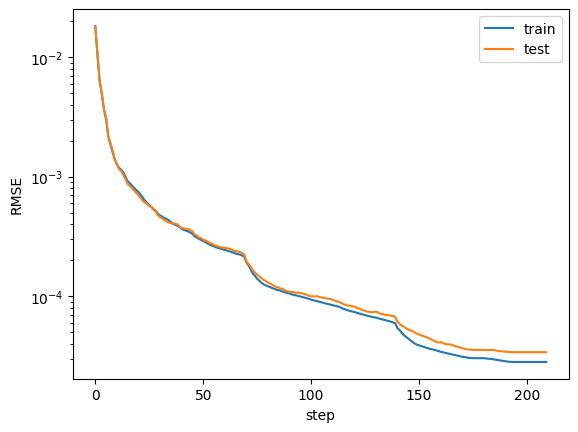

In [132]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

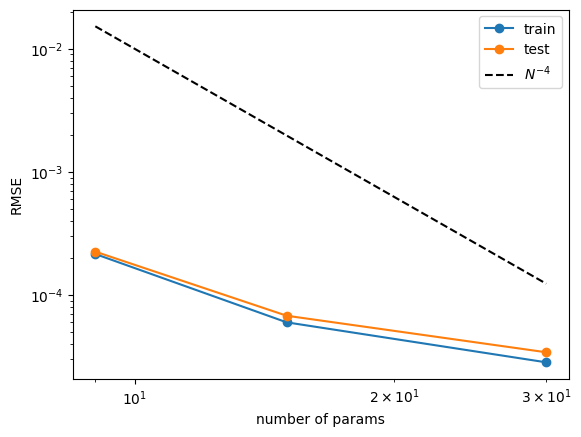

In [133]:
plt.yscale('log')
n_params = 3 * grids
train_vs_G = train_rmse[(steps - 1)::steps]
test_vs_G = test_rmse[(steps - 1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100 * n_params ** (-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp5: steps=80,grids=[3,5,10],opt="LBFGS"

In [4]:
grids = np.array([3,5,10])

train_rmse = []
test_rmse = []
steps = 80
k = 3
model = KAN(width=[4,9,1], grid=10, k=k)

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 1.49e-04 | test loss: 1.64e-04 | reg: 1.80e+01 : 100%|██| 80/80 [01:07<00:00,  1.19it/s]
train loss: 3.46e-05 | test loss: 4.35e-05 | reg: 1.80e+01 : 100%|██| 80/80 [01:27<00:00,  1.09s/it]
train loss: 1.68e-05 | test loss: 2.62e-05 | reg: 1.81e+01 : 100%|██| 80/80 [01:45<00:00,  1.31s/it]


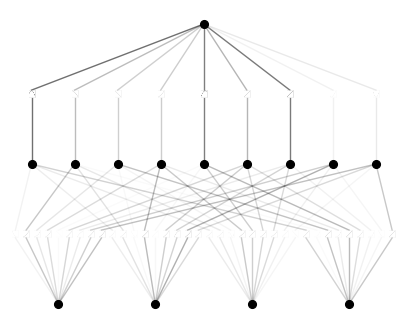

In [5]:
model.plot()

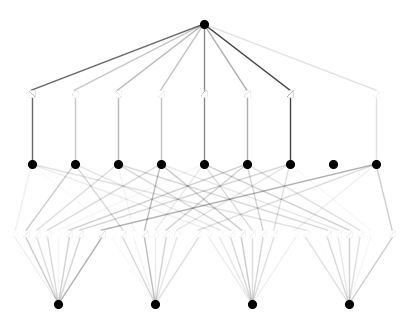

In [147]:
model.prune()
model.plot(mask=True)

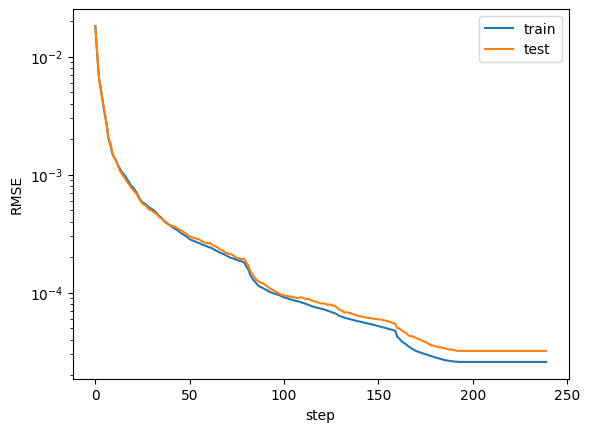

In [168]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

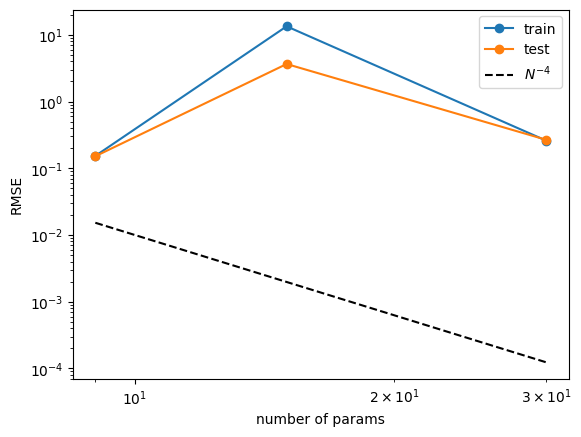

In [175]:
plt.yscale('log')
n_params = 3 * grids
train_vs_G = train_rmse[(steps - 1)::steps]
test_vs_G = test_rmse[(steps - 1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100 * n_params ** (-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp6: steps=50,grids=[3,5,10,15,20],opt="Adam"

In [177]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 50
k = 3
model = KAN(width=[4,9,1], grid=10, k=k)

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,9,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="Adam", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 4.93e+00 | test loss: 3.75e+00 | reg: 2.91e+02 : 100%|██| 50/50 [00:03<00:00, 16.07it/s]
train loss: 9.18e-01 | test loss: 8.24e-01 | reg: 3.48e+02 : 100%|██| 50/50 [00:03<00:00, 14.35it/s]
train loss: 1.08e+00 | test loss: 9.93e-01 | reg: 6.26e+02 : 100%|██| 50/50 [00:04<00:00, 11.00it/s]
train loss: 1.65e+00 | test loss: 1.50e+00 | reg: 7.87e+02 : 100%|██| 50/50 [00:05<00:00,  9.13it/s]
train loss: 2.05e-01 | test loss: 2.17e-01 | reg: 8.73e+02 : 100%|██| 50/50 [00:06<00:00,  7.36it/s]


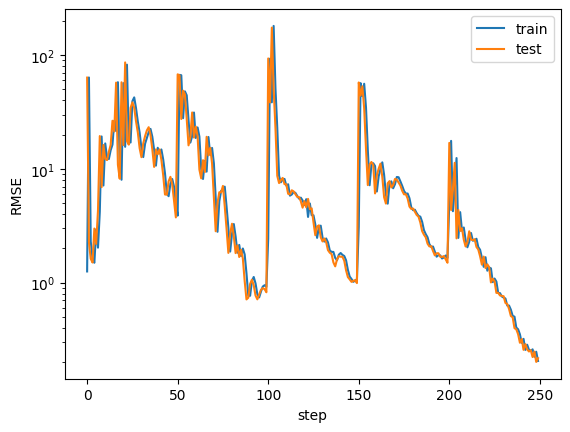

In [178]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')